<a href="https://colab.research.google.com/github/anandhuarjuna/Deep-Learning/blob/main/Deep_Learning_Framingham_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.drop(['education'],axis=1,inplace=True)


In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol']=df['totChol'].fillna(df['totChol'].mode()[0])
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mode()[0])
df['glucose']=df['glucose'].fillna(df['glucose'].mode()[0])





In [ ]:
df.isna().sum()
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new=sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=.3,random_state=50)

In [ ]:
from tensorflow.keras.models import Sequential
ann=Sequential()
ann.add(keras.layers.Dense(20,activation='relu'))
ann.add(keras.layers.Dense(22,activation='relu'))
ann.add(keras.layers.Dense(24,activation='relu'))
ann.add(keras.layers.Dense(1,activation='sigmoid'))


In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs=150,batch_size=5)

Epoch 1/150
594/594 [==============================] - 2s 3ms/step - loss: 0.4267 - accuracy: 0.8484
Epoch 2/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3802 - accuracy: 0.8555
Epoch 3/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3736 - accuracy: 0.8571
Epoch 4/150
594/594 [==============================] - 3s 5ms/step - loss: 0.3662 - accuracy: 0.8582
Epoch 5/150
594/594 [==============================] - 2s 4ms/step - loss: 0.3615 - accuracy: 0.8598
Epoch 6/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3575 - accuracy: 0.8629
Epoch 7/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3551 - accuracy: 0.8632
Epoch 8/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3536 - accuracy: 0.8652
Epoch 9/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3490 - accuracy: 0.8649
Epoch 10/150
594/594 [==============================] - 2s 3ms/step - loss: 0.3465 - accura

In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>.5)

40/40 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1069
           1       0.27      0.24      0.26       203

    accuracy                           0.78      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.77      0.78      0.77      1272



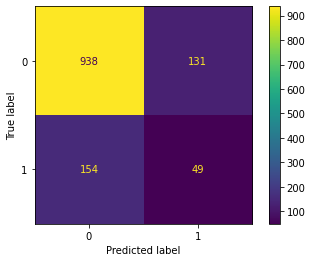

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))